# Exercise 04 : Histogram


- analyze only the users and not the admins
- create two lists of values (for working days and for weekends) for the histogram input
- the figsize is still the same, you can choose the fontsize as well as the color palette
- use a level of transparency for the histogram in front equal to 0.7

In [ ]:
import sqlite3
import pandas as pd

connection = sqlite3.connect('../data/logs.db')
cursor = connection.cursor()
cursor.execute("ATTACH DATABASE '../data/checking-logs.sqlite' AS logs")
connection.commit()

checker_query = """
SELECT uid, timestamp
FROM checker
WHERE uid LIKE 'user_%'
"""
timestamp = pd.io.sql.read_sql(checker_query, connection)
df = pd.DataFrame(timestamp)

df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.dayofweek

working_days = df[df['day'] < 5]['hour'].tolist()
weekends = df[df['day'] >= 5]['hour'].tolist()


connection.close()

In [4]:
df

,uid,timestamp,date,hour,day
0,user_4,2020-04-17 05:19:02.744528,2020-04-17,5,4
1,user_4,2020-04-17 05:22:35.249331,2020-04-17,5,4
2,user_4,2020-04-17 05:22:45.549397,2020-04-17,5,4
3,user_4,2020-04-17 05:34:14.691200,2020-04-17,5,4
4,user_4,2020-04-17 05:34:24.422370,2020-04-17,5,4
...,...,...,...,...,...
3202,user_1,2020-05-21 20:19:06.872761,2020-05-21,20,3
3203,user_1,2020-05-21 20:22:41.785725,2020-05-21,20,3
3204,user_1,2020-05-21 20:22:41.877806,2020-05-21,20,3
3205,user_1,2020-05-21 20:37:00.129678,2020-05-21,20,3


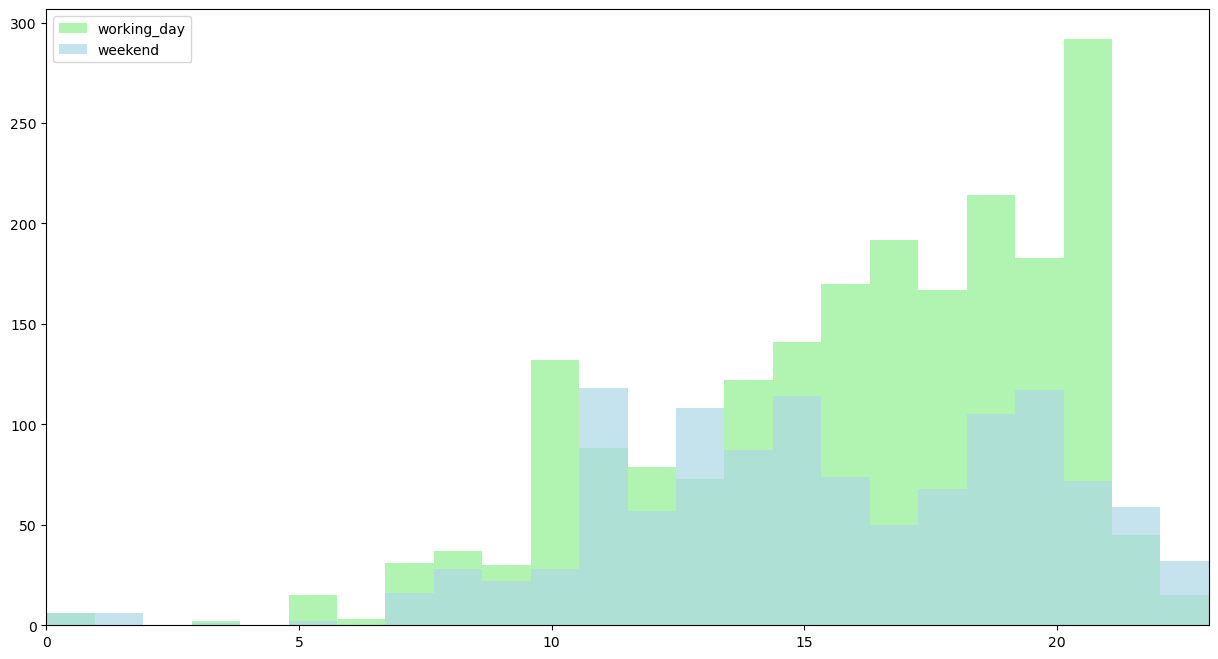

In [2]:
import matplotlib.pyplot as plt

# Assuming day_count and end_count are Series with the number of commits per hour

plt.figure(figsize=(15, 8))

# Plot the first histogram
plt.hist(working_days, bins=24, alpha=0.7, label='working_day', color='lightgreen')

# Plot the second histogram on top of the first
plt.hist(weekends, bins=24, alpha=0.7, label='weekend', color='lightblue')
plt.legend(loc='upper left')
plt.xlim(0, 23)

plt.show()

## Are there hours when the total number of commits was higher on weekends than on working days?

yes on 11, 13, 22, 23